In [2]:
from google.colab import drive
drive.mount('/content/drive')
%cd '/content/drive/Shareddrives/Computational Semantics A3/Code'

Mounted at /content/drive
/content/drive/Shareddrives/Computational Semantics A3/Code


In [2]:
import os
import pandas as pd
import numpy as np
import spacy
import gensim.downloader as api
from gensim.models import FastText
import string
import numpy as np
from scipy.linalg import orthogonal_procrustes
from sklearn.metrics.pairwise import cosine_similarity

# Corpus Preprocessing
Don't need to run this anymore

In [ ]:
class TextProcessor():
    def __init__(self, spacy_pipeline:str="en_core_web_lg"):
        try:
            self.nlp = spacy.load(spacy_pipeline)
        except:
            !python3 -m spacy download {spacy_pipeline}
            self.nlp = spacy.load(spacy_pipeline)

    def lemmatize_text(self, text):
      doc = self.nlp(text)
      lemmas = [token.lemma_ for token in doc]

      return " ".join(lemmas)


    def tokenize_text(self, text):
        doc = self.nlp(text)
        tokens = [token.text for token in doc]
        return tokens

    def pos_tagging(self, text):
        doc = self.nlp(text)
        pos = [token.tag_ for token in doc]
        return pos

    def sentence_segmentation(self, text):
        doc = self.nlp(text)
        assert doc.has_annotation("SENT_START")
        sentences = [sentence.text for sentence in doc.sents]
        return sentences

In [ ]:
files = []

for (dirpath, dirnames, filenames) in os.walk('coha_samples_text'):
  # only read the files that are before 1910
  files = ['coha_samples_text/'+f for f in filenames if int(f.split(".")[0].split("_")[1]) <= 1910]

coha_corpus = []

for f in files:
  with open(f, 'r', encoding='utf-8') as file:
    text = file.read()
    coha_corpus.append(text)

In [ ]:
def load_corpus(folder_path):
    corpus = []
    for filename in os.listdir(folder_path):
        if filename.endswith(".txt"):
            file_path = os.path.join(folder_path, filename)
            ge
                corpus.append(text)
    return corpus


# Load COCA and COHA
coca_corpus = load_corpus('coca_samples_text')

# Print the first few characters of the first document in each corpus
print("COCA Corpus:", coca_corpus[0][:100])
print("\nCOHA Corpus:", coha_corpus[0][:100])

COCA Corpus: 
@@4000241 I think it is safe to say that ours is the only dining room in West Los Angeles on whose 

COHA Corpus: @@430250

T 0 the purist slang is an unmitigated evil which makes for the gradual corruption and dec


In [ ]:
text_processor = TextProcessor()

2023-12-29 10:22:06.978105: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-29 10:22:06.978195: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-29 10:22:06.988639: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-29 10:22:12.118537: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 587.7/587.7 MB 1.1 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')


In [ ]:
text_processor.lemmatize_text("hello i am feeling incredibly unwell today. aren't you glad you're happiness is not compromised")

'hello I be feel incredibly unwell today . be not you glad you be happiness be not compromise'

In [ ]:
len(coca_corpus[0])

7730559

In [ ]:
# process the corpus so that each line in the text file is one sentence
def process_corpus(corpus:list, output_path:str):
  output = ""
  with open(output_path, 'w') as f:
    f.write(output)
  for text in corpus:
    # the maximum number of characters that the spacy sentence segmentation can handle is 1 000 000.
    if len(text) > 1000000:
      sentences = []
      for i in range(0, len(text), 1000000):
        sentences.extend(text_processor.sentence_segmentation(text[i:i+1000000]))
    else:
      sentences = text_processor.sentence_segmentation(text)
    output = output + "\n".join(sentences)
    with open(output_path, 'a') as f:
        f.write(output)

In [ ]:
process_corpus(coha_corpus, 'coha_corpus.txt')

In [ ]:
process_corpus(coca_corpus, 'coca_corpus.txt')

In [ ]:
modern_model = FastText(window=5)
modern_model.build_vocab(corpus_file='coca_corpus.txt')
total_words = modern_model.corpus_total_words
modern_model.train(corpus_file='coca_corpus.txt', total_words=total_words, epochs=5)

(189309586, 261058485)

In [ ]:
modern_model.save('coca_ft.model')

In [ ]:
old_model = FastText(window=5)
old_model.build_vocab(corpus_file='coha_corpus.txt')
total_words = old_model.corpus_total_words
old_model.train(corpus_file='coha_corpus.txt', total_words=total_words, epochs=5)

In [ ]:
old_model.save('coha_ft.model')

# Pre-processing v2

Lemmatize, lowercase and remove punctuations from the text

In [ ]:
# process the corpus so that each line in the text file is one sentence
def process_corpus_v2(corpus:list, output_path:str):
  output = ""

  with open(output_path, 'w') as f:
    f.write(output)
  for text in corpus:
    # the maximum number of characters that the spacy sentence segmentation can handle is 1 000 000.
    if len(text) > 1000000:
      sentences = []
      for i in range(0, len(text), 1000000):
        temp_text = text_processor.lemmatize_text(text[i:i+1000000])
        sentences.extend(text_processor.sentence_segmentation(temp_text))
    else:
      sentences = text_processor.sentence_segmentation(text)
    output = output + "\n".join(sentences)
    translator = str.maketrans('', '', string.punctuation)
    output = output.translate(translator)
    with open(output_path, 'a') as f:
        f.write(output)

In [ ]:
process_corpus_v2(coha_corpus, 'coha_corpus_v2.txt')

In [ ]:
process_corpus_v2(coca_corpus, 'coca_corpus_v2.txt')

In [ ]:
modern_model = FastText(window=5)
modern_model.build_vocab(corpus_file='coca_corpus_v2.txt')
total_words = modern_model.corpus_total_words
modern_model.train(corpus_file='coca_corpus_v2.txt', total_words=total_words, epochs=5)

(163374276, 216592520)

In [ ]:
modern_model.save('coca_ft_v2.model')

In [ ]:
old_model = FastText(window=5)
old_model.build_vocab(corpus_file='coha_corpus_v2.txt')
total_words = old_model.corpus_total_words
old_model.train(corpus_file='coha_corpus_v2.txt', total_words=total_words, epochs=5)

(520326389, 684305935)

In [ ]:
old_model.save('coha_ft_v2.model')

# Pre-processing v3: Word2Vec

In [11]:
from gensim.models import Word2Vec

old_model = Word2Vec(min_count=50,max_vocab_size=50000)
old_model.build_vocab(corpus_file='coha_corpus.txt')
total_words = old_model.corpus_total_words
old_model.train(corpus_file='coha_corpus.txt', total_words=total_words, epochs=5)

(575306487, 840020280)

In [12]:
old_model.save("coha_w2v.model")

In [13]:
modern_model = Word2Vec(min_count=50,max_vocab_size=50000)
modern_model.build_vocab(corpus_file='coca_corpus.txt')
total_words = modern_model.corpus_total_words
modern_model.train(corpus_file='coca_corpus.txt', total_words=total_words, epochs=5)

(172109682, 261058485)

In [14]:
modern_model.save("coca_w2v.model")

# Analysis

In [ ]:
target_words = [
    'thing', 'companion', 'broadcast', 'pudding', 'cool', 'business', 'holiday', 'mouse', 'hound', 'manage',
    'corn', 'meat', 'wife', 'girl', 'lady', 'litter', 'art', 'skyline', 'accident', 'liquor', 'terribly',
    'sick', 'pretty', 'knight', 'nice', 'terrific', 'governor', 'minister', 'fond', 'lord', 'accident',
    'spinster', 'silly', 'disease', 'craft', 'mistress', 'gay', 'lame', 'retarded', 'queer'
]


In [ ]:
old_model = FastText.load('coha_ft.model')

In [ ]:
old_model = FastText.load('coha_ft_v2.model')

In [ ]:
modern_model = FastText.load('coca_ft.model')

In [ ]:
modern_model = FastText.load('coca_ft_v2.model')

In [ ]:
def global_measure(word:str):
  old_wv = old_model.wv[word].reshape(1,-1)
  modern_wv = modern_model.wv[word].reshape(1,-1)

  output = cosine_similarity(old_wv, modern_wv)
  return output[0][0]

def local_neighborhood_measure(word:str):
  # get K-nearest-neighbors where K=50
  old_similarity_pairs = old_model.wv.most_similar(word, topn=50)
  modern_similarity_pairs = modern_model.wv.most_similar(word, topn=50)

  # get the similar words
  old_similarity_words = [words for words, similarity_score in old_similarity_pairs]
  modern_similarity_words = [words for words, similarity_score in modern_similarity_pairs]

  # get the similarity scores of each word
  old_similarity_scores = [similarity_score for words, similarity_score in old_similarity_pairs]
  modern_similarity_scores = [similarity_score for words, similarity_score in modern_similarity_pairs]

  # convert the similarity scores to second order embeddings
  old_second_order_embeddings = np.array(old_similarity_scores).reshape(1,-1)
  modern_second_order_embeddings = np.array(modern_similarity_scores).reshape(1,-1)

  # compare the cosine similarity between the two
  output = cosine_similarity(old_second_order_embeddings, modern_second_order_embeddings)
  return output[0][0]



In [ ]:
cosine_similarity(old_model.wv['thing'].reshape(1,-1), modern_model.wv['thing'].reshape(1,-1))

array([[0.25996011]], dtype=float32)

In [ ]:
analysis = {}
for word in target_words:
  analysis[word] = {
    'global_measure': global_measure(word),
    'local_neighborhood_measure': local_neighborhood_measure(word),
    'old_similarity_pairs': old_model.wv.most_similar(word, topn=50),
    'modern_similarity_pairs': modern_model.wv.most_similar(word, topn=50)
  }

In [ ]:
#Calculate cosine similarity scores for the two points of the same word in two different corpora
# Dictionary to store cosine distance scores for each target word
cosine_distance_scores = {}

# Calculate cosine distance scores for each target word
for word in target_words:
    old_vector = old_model.wv[word].reshape(1, -1)
    modern_vector = modern_model.wv[word].reshape(1, -1)

    # Calculate cosine distance
    cosine_distance = cosine_distances(old_vector, modern_vector)[0][0]

    # Store distance scores in the dictionary
    cosine_distance_scores[word] = cosine_distance

# Display the results
for word, distance_score in cosine_distance_scores.items():
    print(f'{word}: Cosine Distance = {distance_score}')

In [ ]:
# modified the code above to use the global measure function instead
# should be the same intuition as above

global_measure_scores = {}

for word in target_words:
  global_measure_scores[word] = global_measure(word)

for word, score in global_measure_scores.items():
  print(f'{word}: Global Measure = {score}')

thing: Global Measure = 0.2599601149559021
companion: Global Measure = 0.0441339835524559
broadcast: Global Measure = 0.09182406216859818
pudding: Global Measure = 0.031491123139858246
cool: Global Measure = 0.0595494769513607
business: Global Measure = 0.13981695473194122
holiday: Global Measure = 0.06636426597833633
mouse: Global Measure = 0.14679132401943207
hound: Global Measure = 0.03719482570886612
manage: Global Measure = 0.031337443739175797
corn: Global Measure = 0.06938403844833374
meat: Global Measure = 0.04039487615227699
wife: Global Measure = 0.02003931812942028
girl: Global Measure = 0.061692386865615845
lady: Global Measure = -0.1740853190422058
litter: Global Measure = -0.04275379702448845
art: Global Measure = 0.19931542873382568
skyline: Global Measure = 0.27592962980270386
accident: Global Measure = 0.14900541305541992
liquor: Global Measure = 0.18082305788993835
terribly: Global Measure = -0.0007534013129770756
sick: Global Measure = -0.07926826179027557
pretty: Gl

In [ ]:
# do the same thing for the local neighborhood measure

local_neighborhood_scores = {}

for word in target_words:
  local_neighborhood_scores[word] = local_neighborhood_measure(word)

for word, score in local_neighborhood_scores.items():
  print(f'{word}: Local Neighborhood Measure = {score}')


thing: Local Neighborhood Measure = 0.9995902814980319
companion: Local Neighborhood Measure = 0.9963375181650066
broadcast: Local Neighborhood Measure = 0.9990692925193453
pudding: Local Neighborhood Measure = 0.9945589519894564
cool: Local Neighborhood Measure = 0.9998442684381144
business: Local Neighborhood Measure = 0.9993747658238492
holiday: Local Neighborhood Measure = 0.9972627677016498
mouse: Local Neighborhood Measure = 0.9980039395737663
hound: Local Neighborhood Measure = 0.9955541958990098
manage: Local Neighborhood Measure = 0.9964620243668352
corn: Local Neighborhood Measure = 0.9978104811882252
meat: Local Neighborhood Measure = 0.9993591629885932
wife: Local Neighborhood Measure = 0.9990077333567662
girl: Local Neighborhood Measure = 0.9995733236562784
lady: Local Neighborhood Measure = 0.9990981584248667
litter: Local Neighborhood Measure = 0.9991386510219441
art: Local Neighborhood Measure = 0.999799694468357
skyline: Local Neighborhood Measure = 0.9996141460465763


They both don't really perform that well.. for the global measure it's most likely because of their embeddings not being aligned like what was mentioned in Kutuzov et al. For the local neighborhood measure will have to dig deeper, but most likely its because the words that are nearest are similar see below

In [ ]:
def k_most_similar_words(word:str, k:int):
  old_similarity_pairs = old_model.wv.most_similar(word, topn=k)
  modern_similarity_pairs = modern_model.wv.most_similar(word, topn=k)

  old_words = [word for word, score in old_similarity_pairs]
  modern_words = [word for word, score in modern_similarity_pairs]

  old_scores = [score for word, score in old_similarity_pairs]
  modern_scores = [score for word, score in modern_similarity_pairs]

  print(f'{word}:')
  print('\t\t\tOLD\t\t-\t\tMODERN')
  for i in range(k):
    print(f'\t{old_words[i]} ({old_scores[i]}) - {modern_words[i]} ({modern_scores[i]})')

In [ ]:
k_most_similar_words(target_words[3], 50)

pudding:
			OLD		-		MODERN
	puddin (0.8192639350891113) - budding (0.8974472284317017)
	jackpudding (0.8013932108879089) - Pudding (0.8883365392684937)
	puddings (0.7692901492118835) - plodding (0.8756483793258667)
	Pudding (0.7590551376342773) - shedding (0.8748070001602173)
	budding (0.686030924320221) - shredding (0.8635518550872803)
	puddling (0.6739667057991028) - sledding (0.8635374903678894)
	puddle (0.6506692171096802) - padding (0.8534246683120728)
	cornpuddings (0.6034812331199646) - skidding (0.8465644717216492)
	ketched (0.5966933965682983) - bedding (0.8450238704681396)
	thudding (0.5896744728088379) - ping (0.8385041356086731)
	puddyfat (0.5767521262168884) - nodding (0.8338356018066406)
	hooking (0.5641154050827026) - kidding (0.831932783126831)
	drummed (0.5522821545600891) - barfing (0.8292505145072937)
	pricked (0.5448073148727417) - bidding (0.8289631009101868)
	pummelled (0.5447372794151306) - riesling (0.8288348913192749)
	bricked (0.5377592444419861) - puffing (0.

Something seems off with our similar words why are they all morphologically similar instead of semantically similar..

In [ ]:
k_most_similar_words(target_words[0], 50)

thing:
			OLD		-		MODERN
	aomething (0.6777156591415405) - thingg (0.9473161101341248)
	assomething (0.6415916085243225) - thingi (0.9417424201965332)
	enything (0.6139915585517883) - thingy (0.9341543316841125)
	Worthing (0.5985921621322632) - things1 (0.9257938265800476)
	farthing (0.5621525049209595) - thingif (0.9180141687393188)
	Nothing (0.5544679760932922) - things40 (0.9091818928718567)
	nothing (0.553244948387146) - thingie (0.9070988893508911)
	Anything (0.5527385473251343) - things32 (0.9039991497993469)
	tithing (0.5402052402496338) - things (0.8570989370346069)
	anything (0.5365214347839355) - seething (0.8367485404014587)
	something (0.5343747138977051) - ofthing (0.8329172730445862)
	seething (0.5321211814880371) - teething (0.8320537209510803)
	Something (0.5311230421066284) - scything (0.831355631351471)
	word (0.5310866832733154) - aything (0.8295772075653076)
	harm (0.5275979042053223) - thingslike (0.817064642906189)
	thinly (0.526607096195221) - tithing (0.80804961

In [ ]:
k_most_similar_words(target_words[1], 50)

companion:
			OLD		-		MODERN
	roadcompanion (0.8575758337974548) - companionship (0.868156373500824)
	companionway (0.8375102877616882) - anion (0.8616628646850586)
	Companion (0.7494298815727234) - companionable (0.8609155416488647)
	ladycompanion (0.7256610989570618) - accompaniment (0.8180367946624756)
	companions (0.7021386027336121) - DyMaxion (0.8158414363861084)
	companionable (0.6847699880599976) - opnion (0.8128131628036499)
	companionless (0.6706956028938293) - collodion (0.799099862575531)
	friend (0.6232820749282837) - ONion (0.7952147722244263)
	frien (0.619995653629303) - pion (0.7937541007995605)
	companionship (0.6173714399337769) - Onion (0.7907483577728271)
	hment (0.6068182587623596) - conglomeration (0.7904272079467773)
	aifection (0.6065319180488586) - albion (0.7900056838989258)
	compan (0.6046328544616699) - coition (0.7883687019348145)
	convalescence (0.5986934900283813) - Companion (0.7876579761505127)
	Dance (0.5953733325004578) - saturation (0.787540316581726

In [ ]:
k_most_similar_words(target_words[2], 50)

In [ ]:
k_most_similar_words(target_words[3], 50)

In [ ]:
k_most_similar_words(target_words[4], 50)

In [ ]:
k_most_similar_words(target_words[5], 50)

In [ ]:
k_most_similar_words(target_words[6], 50)

In [ ]:
k_most_similar_words(target_words[7], 50)

In [ ]:
k_most_similar_words(target_words[8], 50)

In [ ]:
k_most_similar_words(target_words[9], 50)

manage:
			OLD		-		MODERN
	managetnent (0.7738155722618103) - mismanage (0.8257203698158264)
	manages (0.7285425662994385) - micromanage (0.7678191661834717)
	managin (0.6915484070777893) - chnage (0.7565056085586548)
	manageable (0.6664955019950867) - managerial (0.7523259520530701)
	management (0.6654910445213318) - managing (0.7442914843559265)
	managing (0.6272228360176086) - management (0.7384616136550903)
	managements (0.609050452709198) - manageable (0.7335440516471863)
	managed (0.6069795489311218) - management9 (0.7302124500274658)
	manager (0.5829271078109741) - resocialize (0.7031713724136353)
	nage (0.5691468119621277) - linage (0.6974933743476868)
	consulate (0.5644947290420532) - concubinage (0.6952090859413147)
	managers (0.5510194897651672) - cofinance (0.6914459466934204)
	hedicates (0.5221988558769226) - manager (0.6882525086402893)
	manand (0.5209277868270874) - mismanagement (0.6879969835281372)
	criticize (0.5205659866333008) - Orphanage (0.6878264546394348)
	inter

In [ ]:
k_most_similar_words(target_words[10], 50)

In [ ]:
k_most_similar_words(target_words[11], 50)

In [ ]:
k_most_similar_words(target_words[12], 50)

In [ ]:
k_most_similar_words(target_words[13], 50)

In [ ]:
k_most_similar_words(target_words[14], 50)

In [ ]:
k_most_similar_words(target_words[15], 50)

In [ ]:
k_most_similar_words(target_words[16], 50)

In [ ]:
k_most_similar_words(target_words[17], 50)

In [ ]:
k_most_similar_words(target_words[18], 50)

In [ ]:
k_most_similar_words(target_words[19], 50)

In [ ]:
k_most_similar_words(target_words[20], 50)

In [ ]:
k_most_similar_words(target_words[21], 50)

sick:
			OLD		-		MODERN
	fisick (0.6053698658943176) - sick. (0.9270011782646179)
	sickly (0.588198184967041) - sickofit5 (0.8345487117767334)
	sick-bed (0.5796144604682922) - sick-ass (0.8091081380844116)
	sickroom (0.5772590637207031) - sick-bag (0.7763344049453735)
	sickle (0.5713604092597961) - sicken (0.7532514333724976)
	sic (0.5433522462844849) - sickle (0.7240825891494751)
	sickles (0.5321390628814697) - homesick (0.7103613615036011)
	sicken (0.5136861205101013) - lovesick (0.7071710228919983)
	sickly-looking (0.5098720788955688) - sicker (0.7021024823188782)
	sick-hed (0.5090208053588867) - sickest (0.6828732490539551)
	sin-sick (0.5047906041145325) - carsick (0.6799888610839844)
	whittle (0.4772050976753235) - sickbed (0.6675395965576172)
	galas (0.47681018710136414) - sickens (0.6556922197341919)
	mud (0.45546755194664) - scaredycat (0.6397642493247986)
	dead (0.44703808426856995) - hungry (0.6374017596244812)
	ashen (0.4415339529514313) - sorry-ass (0.6274372935295105)
	blo

In [ ]:
k_most_similar_words(target_words[22], 50)

In [ ]:
k_most_similar_words(target_words[23], 50)

In [ ]:
k_most_similar_words(target_words[24], 50)

In [ ]:
k_most_similar_words(target_words[25], 50)

In [ ]:
k_most_similar_words(target_words[26], 50)

In [ ]:
k_most_similar_words(target_words[27], 50)

In [ ]:
k_most_similar_words(target_words[28], 50)

In [ ]:
k_most_similar_words(target_words[29], 50)

In [ ]:
k_most_similar_words(target_words[30], 50)

In [ ]:
k_most_similar_words(target_words[31], 50)

In [ ]:
k_most_similar_words(target_words[32], 50)

In [ ]:
k_most_similar_words(target_words[33], 50)

In [ ]:
k_most_similar_words(target_words[34], 50)

In [ ]:
k_most_similar_words(target_words[35], 50)

In [ ]:
k_most_similar_words(target_words[36], 50)

In [ ]:
k_most_similar_words(target_words[37], 50)

In [ ]:
k_most_similar_words(target_words[38], 50)

In [ ]:
k_most_similar_words(target_words[39], 50)

queer:
			OLD		-		MODERN
	queerly (0.6912515759468079) - quee (0.8485186100006104)
	queerer (0.6861082315444946) - queering (0.7892916798591614)
	queered (0.6009406447410583) - queen (0.7595348954200745)
	queerlooking (0.5981650352478027) - queemess (0.7495607733726501)
	queerest (0.5757589340209961) - quedan (0.7021052241325378)
	goodlookin (0.4927278459072113) - queloz (0.6949551105499268)
	queerness (0.48592108488082886) - quelque (0.684979259967804)
	daisy (0.474556028842926) - heteronormative (0.6740642786026001)
	pickin (0.47283992171287537) - Queer (0.6674838066101074)
	scrabble (0.46280866861343384) - querencia (0.6651667952537537)
	mudder (0.4514883756637573) - quer (0.6623572707176208)
	finer (0.4485519528388977) - quel (0.6620089411735535)
	goodlooking (0.44730111956596375) - Macheteros (0.66164630651474)
	goodlier (0.44149965047836304) - Gnifique (0.6465478539466858)
	funny (0.43912193179130554) - Selena (0.6454622149467468)
	spick (0.438610702753067) - heteronormatively (0

In [ ]:
# Align the words using Procrustes

# get common words between both models
common_words = list(set(old_model.wv.index_to_key) | set(modern_model.wv.index_to_key))

# create the common word matrix for each corpus
old_matrix = np.vstack([old_model.wv[w] for w in common_words])
modern_matrix = np.vstack([modern_model.wv[w] for w in common_words])

# apply procrustes to both matrices
T, _ = orthogonal_procrustes(old_matrix, modern_matrix)

old_aligned = np.dot(old_matrix, T)

In [ ]:
def aligned_global_measure(word:str, matrixA, matrixB):
  if word in common_words:
    idx = common_words.index(word)

    return cosine_similarity(matrixA[idx].reshape(1,-1), matrixB[idx].reshape(1,-1))[0][0]
  else:
    print('word is not present in both corpora')
    return 0

In [ ]:
global_measure_scores = {}

for word in target_words:
  global_measure_scores[word] = aligned_global_measure(word, old_aligned, modern_matrix)

for word, score in global_measure_scores.items():
  print(f'{word}: Aligned Global Measure = {score}')

thing: Aligned Global Measure = 0.6375420689582825
companion: Aligned Global Measure = 0.590474545955658
broadcast: Aligned Global Measure = 0.20293588936328888
pudding: Aligned Global Measure = 0.5968353152275085
cool: Aligned Global Measure = 0.3739880323410034
business: Aligned Global Measure = 0.667691171169281
holiday: Aligned Global Measure = 0.4480055570602417
mouse: Aligned Global Measure = 0.554155707359314
hound: Aligned Global Measure = 0.5089868903160095
manage: Aligned Global Measure = 0.48223963379859924
corn: Aligned Global Measure = 0.5838080048561096
meat: Aligned Global Measure = 0.549403190612793
wife: Aligned Global Measure = 0.726485013961792
girl: Aligned Global Measure = 0.6415926814079285
lady: Aligned Global Measure = 0.5824406147003174
litter: Aligned Global Measure = 0.5552229285240173
art: Aligned Global Measure = 0.4701075255870819
skyline: Aligned Global Measure = 0.728325605392456
accident: Aligned Global Measure = 0.6371589303016663
liquor: Aligned Globa

# Futher Analysis

don't run for now

In [ ]:
from sklearn.manifold import TSNE

# visualize the aligned common words
def visualize(common_words, matrixA, matrixB):
  A_embedded = TSNE(n_components=2).fit_transform(matrixA)
  B_embedded = TSNE(n_components=2).fit_transform(matrixB)

In [ ]:
from sklearn.manifold import TSNE

A_embedded = TSNE(n_components=2).fit_transform(old_aligned)

In [ ]:
B_embedded = TSNE(n_components=2).fit_transform(modern_matrix)

In [ ]:
import plotly.express as px

In [ ]:
# apply procrustes only to the stop words
import spacy
from spacy.lang.en import stop_words

stop_idx = []

# get the indices in common_words of all the STOP_WORDS
for word in stop_words.STOP_WORDS:
  if word in common_words:
    stop_idx.append(common_words.index(word))
  else:
    print(word)

old_matrix_subset = old_matrix[stop_idx, :]
modern_matrix_subset = modern_matrix[stop_idx, :]

T, _ = orthogonal_procrustes(old_matrix_subset, modern_matrix_subset)

old_aligned_2 = np.dot(old_matrix, T.T)

‘s
n‘t
whereafter
’re
hereupon
n’t
’ll
’d
’s
‘d
‘re
‘m
’ve
‘ve
’m
‘ll


In [ ]:
global_measure_scores = {}

for word in target_words:
  global_measure_scores[word] = aligned_global_measure(word, old_aligned_2, modern_matrix)

for word, score in global_measure_scores.items():
  print(f'{word}: Aligned Global Measure = {score}')

thing: Aligned Global Measure = -0.032737210392951965
companion: Aligned Global Measure = 0.054236430674791336
broadcast: Aligned Global Measure = -0.05206117779016495
pudding: Aligned Global Measure = 0.12025079131126404
cool: Aligned Global Measure = -0.15619193017482758
business: Aligned Global Measure = 0.001160760410130024
holiday: Aligned Global Measure = 0.015391631983220577
mouse: Aligned Global Measure = 0.005713161081075668
hound: Aligned Global Measure = -0.2595136761665344
manage: Aligned Global Measure = -0.046841807663440704
corn: Aligned Global Measure = -0.06342454999685287
meat: Aligned Global Measure = -0.21143485605716705
wife: Aligned Global Measure = 0.13293547928333282
girl: Aligned Global Measure = 0.022581078112125397
lady: Aligned Global Measure = -0.0911451131105423
litter: Aligned Global Measure = -0.048440203070640564
art: Aligned Global Measure = 0.16240723431110382
skyline: Aligned Global Measure = 0.03815706819295883
accident: Aligned Global Measure = -0.

In [ ]:
old_model.wv[old_model.wv.index_to_key[0]]

array([ 6.5053308e-01, -1.1705215e+01, -9.6337118e+00,  4.0729361e+00,
       -9.7048664e+00, -3.8812310e-03,  2.5348010e-02, -3.2039118e+00,
        8.2225066e-01,  3.2606440e+00,  2.4375947e+00,  4.2019910e-01,
       -1.0743675e+00, -3.2130866e+00, -2.5104907e+00,  3.1973832e+00,
        1.1477659e+00, -3.2554395e+00, -3.9806902e+00, -8.7096519e+00,
        5.7863102e+00,  1.0453202e+00, -3.3951650e+00, -2.1661583e-01,
        6.0576642e-01, -5.2774577e+00, -6.2562317e-01,  5.1265464e+00,
       -3.3536940e+00, -2.6376266e+00,  5.1329517e-01,  6.8543391e+00,
       -1.0064092e+00,  2.7738018e+00,  3.5163951e+00, -6.8298965e+00,
        3.7517731e+00, -3.9875045e+00, -3.0918584e+00,  4.9941449e+00,
       -3.4659450e+00,  1.7544807e+00, -2.6720688e+00,  1.6070498e+00,
        1.8746783e+00,  3.9830041e-01, -1.7156392e-01, -1.3303146e-01,
       -1.2617199e-01, -5.6264222e-01, -5.2763476e+00,  2.2871995e+00,
       -1.5546386e-01, -3.3111506e+00, -2.2021208e+00, -7.2300005e+00,
      

In [ ]:
old_model.wv.index_to_key[0]

','

<ipython-input-20-137b12fb4a4f>:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  similarity_df = similarity_df.append({
<ipython-input-20-137b12fb4a4f>:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  similarity_df = similarity_df.append({
<ipython-input-20-137b12fb4a4f>:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  similarity_df = similarity_df.append({
<ipython-input-20-137b12fb4a4f>:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  similarity_df = similarity_df.append({
<ipython-input-20-137b12fb4a4f>:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat 

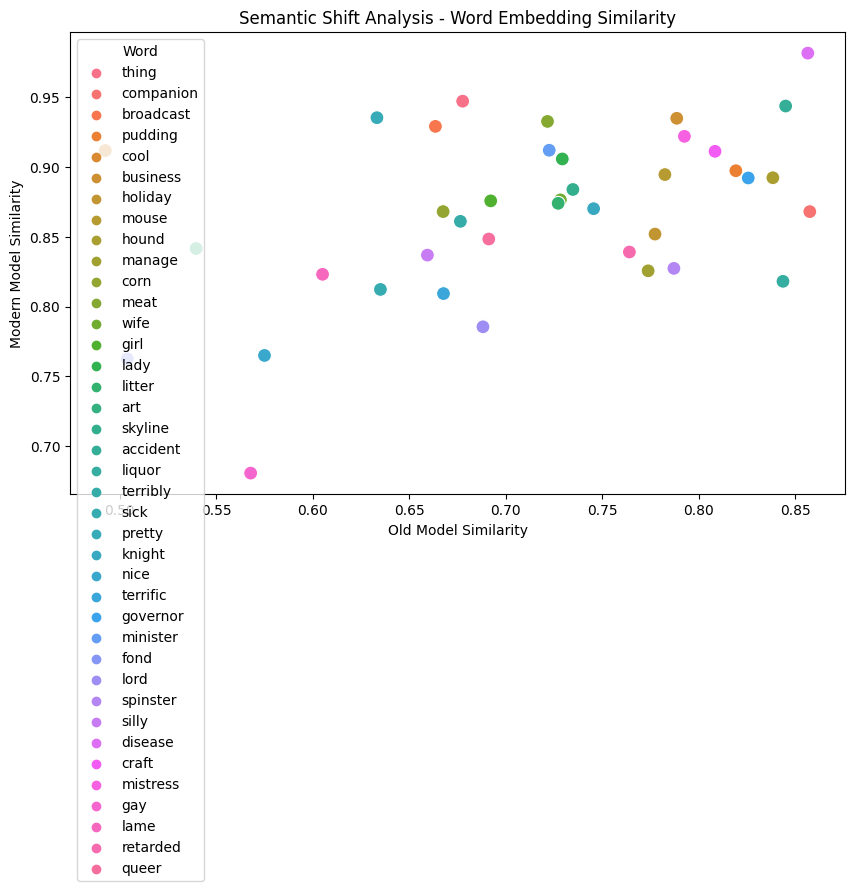

In [ ]:
#Visualisations of semantic shifts


import matplotlib.pyplot as plt
import seaborn as sns

# List of target words
target_words = [
    'thing', 'companion', 'broadcast', 'pudding', 'cool', 'business', 'holiday', 'mouse', 'hound', 'manage',
    'corn', 'meat', 'wife', 'girl', 'lady', 'litter', 'art', 'skyline', 'accident', 'liquor', 'terribly',
    'sick', 'pretty', 'knight', 'nice', 'terrific', 'governor', 'minister', 'fond', 'lord', 'accident',
    'spinster', 'silly', 'disease', 'craft', 'mistress', 'gay', 'lame', 'retarded', 'queer'
]

# Create a DataFrame to store similarity scores
similarity_df = pd.DataFrame(columns=['Word', 'Old_Model_Similarity', 'Modern_Model_Similarity'])

# Calculate similarity scores for each target word
for word in target_words:
    old_similar_words = old_model.wv.most_similar(word, topn=1)
    modern_similar_words = modern_model.wv.most_similar(word, topn=1)

    # Append similarity scores to DataFrame
    similarity_df = similarity_df.append({
        'Word': word,
        'Old_Model_Similarity': old_similar_words[0][1],
        'Modern_Model_Similarity': modern_similar_words[0][1],
    }, ignore_index=True)

# Create a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Old_Model_Similarity', y='Modern_Model_Similarity', data=similarity_df, hue='Word', s=100)

# Add labels and title
plt.title('Semantic Shift Analysis - Word Embedding Similarity')
plt.xlabel('Old Model Similarity')
plt.ylabel('Modern Model Similarity')

# Display the plot
plt.show()
